Stel, een klant komt naar je toe en vraagt of je overeenkomsten kan vinden tussen klanten. Deze overeenkomsten moeten alle klanten groeperen om zo de groepen beter te kunnen benaderen met bv. gepersonaliseerde reclame of aanbiedingen.

Één mogelijke manier is door gebruik te maken van een clustering algoritme. Omdat de dataset klein is en verklaarbaarheid van de data een grote rol speelt, maken we gebruik van hiërarchische clustering analyse.

Laten we beginnen met het importeren van de dataset.

In [1]:
import pandas as pd

# Substitute the path_to_file content by the path to your shopping-data.csv file 
path_to_file = 'data.csv'
customer_data = pd.read_csv(path_to_file)

In [2]:
customer_data.shape

(10106, 11)

In [3]:
customer_data.columns

Index(['country', 'country_code', 'continent', 'population', 'indicator',
       'weekly_count', 'year_week', 'rate_14_day', 'cumulative_count',
       'source', 'note'],
      dtype='object')

Laten we even wat verder induiken op de "spending habits" van de klanten door de spending score in een histogram te plaatsen.

<AxesSubplot: >

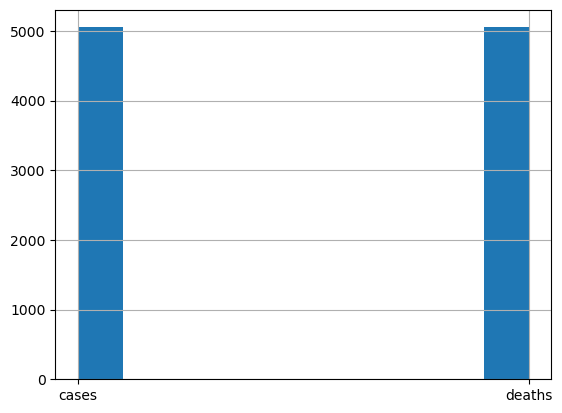

In [20]:
customer_data['indicator'].hist()

In [6]:
# transpose() transposes the table, making it easier for us to compare values
customer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
population,10106.0,2.875359e+07,7.846856e+07,39055.0,2.108977e+06,6.916548e+06,1.747542e+07,4.530067e+08
weekly_count,9673.0,3.847881e+04,2.657807e+05,0.0,3.200000e+01,4.680000e+02,5.812000e+03,9.066612e+06
rate_14_day,9587.0,2.916992e+02,7.783843e+02,0.0,9.470393e+00,4.524313e+01,2.276115e+02,1.372865e+04
cumulative_count,9673.0,2.228141e+06,1.268486e+07,0.0,2.883000e+03,3.396400e+04,6.122240e+05,1.848799e+08
note,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10106 entries, 0 to 10105
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           10106 non-null  object 
 1   country_code      9780 non-null   object 
 2   continent         10106 non-null  object 
 3   population        10106 non-null  int64  
 4   indicator         10106 non-null  object 
 5   weekly_count      9673 non-null   float64
 6   year_week         10106 non-null  object 
 7   rate_14_day       9587 non-null   float64
 8   cumulative_count  9673 non-null   float64
 9   source            10106 non-null  object 
 10  note              0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 868.6+ KB


In [8]:
customer_data.head() 

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
0,Austria,AUT,Europe,8932664,cases,NaN,2020-01,NaN,NaN,TESSy COVID-19,NaN
1,Austria,AUT,Europe,8932664,cases,NaN,2020-02,NaN,NaN,TESSy COVID-19,NaN
2,Austria,AUT,Europe,8932664,cases,NaN,2020-03,NaN,NaN,TESSy COVID-19,NaN
3,Austria,AUT,Europe,8932664,cases,NaN,2020-04,NaN,NaN,TESSy COVID-19,NaN
4,Austria,AUT,Europe,8932664,cases,NaN,2020-05,NaN,NaN,TESSy COVID-19,NaN


In [10]:
customer_data['indicator'].unique()

array(['cases', 'deaths'], dtype=object)

In [11]:
customer_data['indicator'].value_counts(normalize=True)

cases     0.5
deaths    0.5
Name: indicator, dtype: float64

In [21]:
intervals = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 4000000]
col = customer_data['weekly_count']
customer_data['week groups'] = pd.cut(x=col, bins=intervals)

# To be able to look at the result stored in the variable
customer_data['week groups'] 

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
10101    (0.0, 10000.0]
10102    (0.0, 10000.0]
10103    (0.0, 10000.0]
10104    (0.0, 10000.0]
10105    (0.0, 10000.0]
Name: week groups, Length: 10106, dtype: category
Categories (13, interval[int64, right]): [(0, 10000] < (10000, 20000] < (20000, 30000] < (30000, 40000] ... (90000, 100000] < (100000, 200000] < (200000, 300000] < (300000, 4000000]]

In [22]:
customer_data.groupby('week groups')['week groups'].count()

week groups
(0, 10000]           7132
(10000, 20000]        565
(20000, 30000]        265
(30000, 40000]        192
(40000, 50000]        111
(50000, 60000]         91
(60000, 70000]         64
(70000, 80000]         64
(80000, 90000]         46
(90000, 100000]        32
(100000, 200000]      242
(200000, 300000]       86
(300000, 4000000]     224
Name: week groups, dtype: int64

In [14]:
# The _oh means one-hot
customer_data_oh = pd.get_dummies(customer_data)
# Display the one-hot encoded dataframe
customer_data_oh 

,population,weekly_count,rate_14_day,cumulative_count,note,country_Austria,country_Belgium,country_Bulgaria,country_Croatia,country_Cyprus,...,"week groups_(0, 10000]","week groups_(10000, 20000]","week groups_(20000, 30000]","week groups_(30000, 40000]","week groups_(40000, 50000]","week groups_(50000, 60000]","week groups_(60000, 70000]","week groups_(70000, 80000]","week groups_(80000, 90000]","week groups_(90000, 100000]"
0,8932664,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8932664,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8932664,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8932664,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8932664,NaN,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10101,10379295,296.0,66.478504,23103.0,NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10102,10379295,206.0,48.365520,23309.0,NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10103,10379295,137.0,33.046560,23446.0,NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10104,10379295,82.0,21.099699,23528.0,NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
customer_data_oh = customer_data_oh.drop(['weekly_count'], axis=1)
customer_data_oh.shape 

(10106, 242)

Het voordeel van one-hot-encoding is het versimpelen van het weergeven van kolom waardes. Het is makkelijk te lezen en te begrijpen. Het nadeel is dat er nu 8 EXTRA kolommen aan zijn gemaakt in de dataset. 

Hiermee kan een dendrogram gemaakt worden, maar eerst is het van belang om te kijken welke oorspronkelijke features tegenover elkaar geplot kunnen worden, waarbij clusters tevoorschijn kunnen komen.

In [18]:
import seaborn as sns
# Seaborn is een data-visualisatie package

# Dropping CustomerID column from data 
customer_data = customer_data.drop('country_code', axis=1)

sns.pairplot(customer_data)

KeyError: "['country_code'] not found in axis"

In [19]:
sns.scatterplot(x=customer_data['Population'],
                y=customer_data['weekly_count'])

KeyError: 'Population'

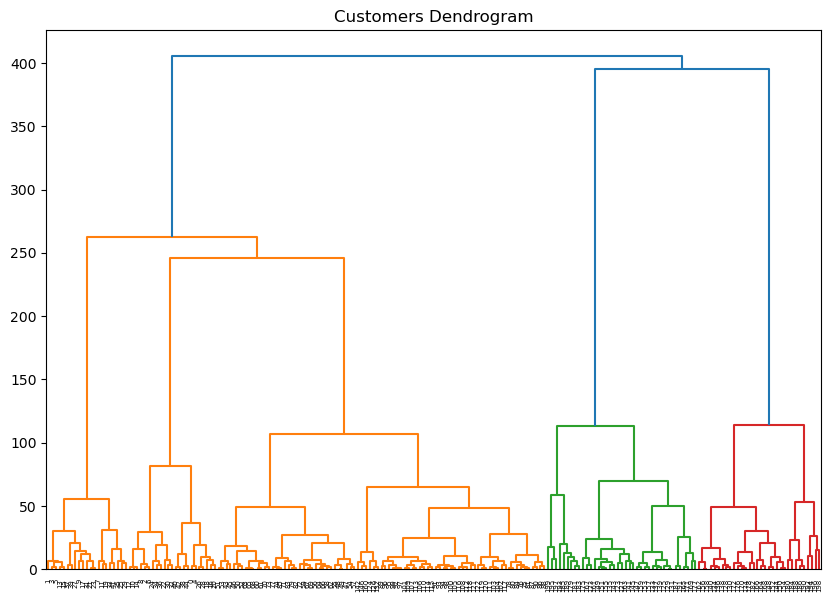

In [23]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Het vinden van het aantal clusters is een beetje puzzelen. Er moet gekeken worden naar de grootste horizontale vlakte in een Dendrogram waar de grootste verticale lijnen door passeren. Twee mogelijke opties hierin zijn of een lijn trekken op een y van 350, of op een y van rond de 125. De lijn die door y = 350 passeert heeft echter niet de grootste verticale lijnen door zich heen lopen. Daarnaast hebben we met de Seaborn plots al een visuele indicatie van 5 clusters gezien. Dit betekent dat we een lijn trekken op y = 125.

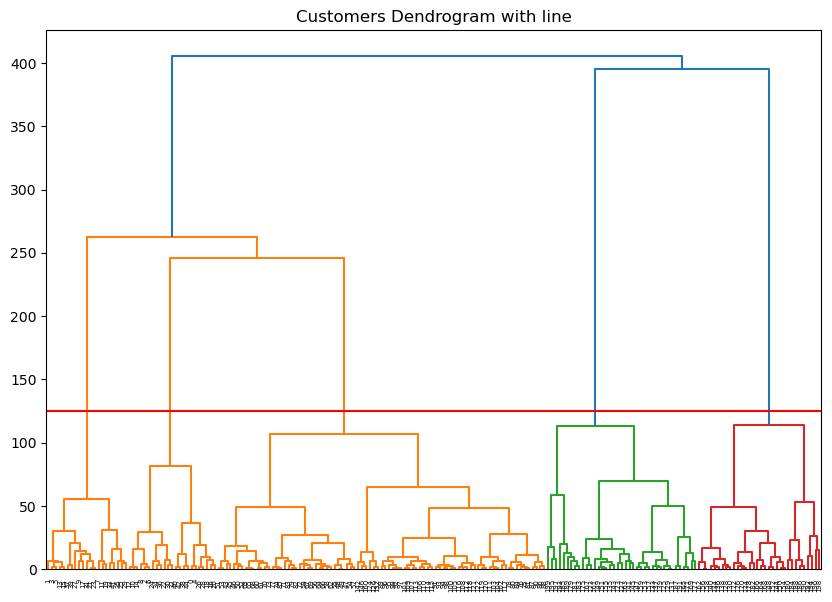

In [26]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')

In [29]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 5, 4, 5, 4,
       0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 2, 6, 2, 5, 2, 6, 2, 6, 4, 6, 2, 6, 4, 6, 2, 6, 2, 6, 2,
       6, 2])

Text(0.5, 1.0, 'Labeled Customer Data')

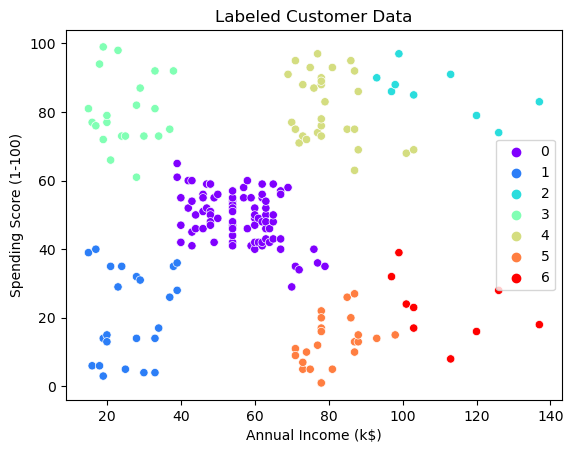

In [28]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')